# Origine des données

Les données proviennent de la DREES : c'est la **Direction de la recherche, des études, de l'évaluation et des statistiques** du **Ministère des Solidarités et de la Santé.**

La publication se fait sur le site opendata de la DREES : [cliquer sur le lien](https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut)

Pour en savoir plus sur les travaux de la DREES : [cliquer sur le lien](https://drees.solidarites-sante.gouv.fr/article/les-travaux-de-la-drees-lies-la-crise-sanitaire-de-la-covid-19)

La publication se fait à un rythme hebdomadaire depuis le 6/08/2021. A cette date, les dernières données disponibles dataient du 23/07.

**On peut donc s'attendre à :**
- publication le 13/08 des données allant jusqu'au 24/07
- publication le 20/08 des données allant jusqu'au 31/07

Au 23/07,
les taux quotidiens pour 100 000 habitants sont les suivants:


- entrées en hospitalisation : 3.83
- entrées en réanimation : 0.98
- décès : 0.25


- incidence : 274.88
- tests PCR : 5299.12
- positivité (%) : 0.52

# Timeline
This analysis was first published on Twitter here: https://twitter.com/E_Dmz/status/1423963822251991040
and here: https://twitter.com/E_Dmz/status/1423692017406775303

Similar analyses can be found here: https://twitter.com/GuillaumeRozier/status/1423609751858991104 (@GuillaumeRozier) and here : https://twitter.com/nicolasberrod/status/1423588729097265155 (@nicolasberrod)

# Libraries and functions

In [20]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

def save_output(fig, dir_name, fig_name, with_date = True, with_SVG = False):
    """Saves pyplot figures as a directory in dir_PNG, with or without the date
    fig: pyplot figure
    dir_fig: str
    name: str
    with_date: boolean
    """
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        
    now_str = dt.datetime.now().strftime("%Y-%m-%d %H:%M") if with_date else ''
    fname_PNG = f"{dir_name}{now_str} {fig_name}.png"
    fig.savefig(fname_PNG, bbox_inches = 'tight', pad_inches = 0.1, dpi = 150)
    
    if with_SVG:
        dir_SVG = f"{dir_name}SVG/"
        os.makedirs(dir_SVG) if not os.path.exists(dir_SVG) else None
        fname_SVG = f"{dir_SVG}{now_str} {fig_name}.svg"
        fig.savefig(fname_SVG, bbox_inches = 'tight', pad_inches = 0.1, dpi = 150)
        
def pretty_sample(df_name_as_string, nlines = 3):
    """pretty_prints a pandas DataFrame
    df_name_as_string: string"""
    print(f"\n\n***Sample of {df_name_as_string}:")
    return eval(f"{df_name_as_string}.sample(nlines)")

def simplify_df(df, vac_statut):
    """only retain one vac_status"""
    simplified_df = df.copy()
    return simplified_df[simplified_df.vac_statut == vac_statut]

def display_vac_statuts(df):
    """just to check vac_statuses in df"""
    print(df.vac_statut.unique())

# Prepare the data
The data were downloaded from https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut into the parent folder of this notebook.


In [21]:
df_raw = pd.read_csv('covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si.csv', sep = ';', parse_dates = ['date'])
pretty_sample("df_raw")

df = df_raw.copy()
dPrimo = df[df.vac_statut.isin(["Primo dose efficace", "Primo dose récente"])].groupby(['date'])[['nb_PCR', 'nb_PCR_sympt', 'nb_PCR+',
       'nb_PCR+_sympt', 'HC', 'HC_PCR+', 'SC', 'SC_PCR+', 'DC', 'DC_PCR+', 'effectif J-7']].sum().reset_index()
dPrimo['vac_statut'] = 'Somme des primo-doses'
pretty_sample("dPrimo")

df_merged = pd.concat([df, dPrimo])
df_merged = df_merged.sort_values('date')
pretty_sample("df_merged")



df = df_merged.copy()
df['Effectif en Mns'] = df['effectif J-7'] / 1e6
df['PCR_odds'] = df['nb_PCR']/df['effectif J-7'] * 1e7
df['PCR_pos_odds'] = df['nb_PCR+']/df['effectif J-7'] * 1e7
df['positivity'] = df['nb_PCR+']/df['nb_PCR'] * 100
df['HC_odds'] = df['HC']/df['effectif J-7'] * 1e7
df['SC_odds'] = df['SC']/df['effectif J-7'] * 1e7
df['DC_odds'] = df['DC']/df['effectif J-7'] * 1e7

# df['HC_PCR_pos_odds'] = df['HC_PCR+']/df['effectif J-7'] * 1e7
# df['SC_PCR_pos_odds'] = df['SC_PCR+']/df['effectif J-7'] * 1e7
# df['DC_PCR_pos_odds'] = df['DC_PCR+']/df['effectif J-7'] * 1e7

df_with_computed_indicators = df.copy()
pretty_sample("df_with_computed_indicators")

df = df_with_computed_indicators.copy()
df = df[['date', 'vac_statut', 'effectif J-7', 'HC_odds', 'SC_odds', 'DC_odds', 'PCR_odds', 'PCR_pos_odds', 'positivity',
       'Effectif en Mns']]
pretty_sample("df")

for vac_statut in ['Ensemble', 'Non-vaccinés', 'Somme des primo-doses', 'Vaccination complète']:
    simplified_df = simplify_df(df, vac_statut)
    pretty_sample("simplified_df", nlines = 1)



***Sample of df_raw:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7
22,2021-06-22,Primo dose récente,536,39,50,21,0,0,1,0,0,0,4908621
188,2021-07-05,Non-vaccinés,167377,9589,3301,1247,91,61,20,13,8,4,33697582
40,2021-06-06,Primo dose efficace,8077,546,84,19,13,11,6,3,5,5,9708517




***Sample of dPrimo:


,date,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7,vac_statut
27,2021-06-27,5913,354,42,15,7,5,2,2,1,1,16490880,Somme des primo-doses
17,2021-06-17,50541,2333,298,84,17,13,5,5,2,2,16634769,Somme des primo-doses
31,2021-07-01,41148,2323,312,104,5,4,1,1,1,1,15725470,Somme des primo-doses




***Sample of df_merged:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7
273,2021-07-09,Ensemble,270860,14177,4482,1539,102,77,28,21,11,6,67407241
271,2021-07-07,Ensemble,215488,14579,3925,1475,91,65,24,13,16,9,67407241
227,2021-07-16,Primo dose efficace,33242,2672,898,385,7,6,0,0,2,1,9272595




***Sample of df_with_computed_indicators:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7,Effectif en Mns,PCR_odds,PCR_pos_odds,positivity,HC_odds,SC_odds,DC_odds
66,2021-07-09,Vaccination complète,54056,2771,433,128,18,10,1,1,2,2,20747779,20.747779,26053.873043,208.697037,0.801021,8.675627,0.481979,0.963959
6,2021-06-06,Somme des primo-doses,8194,569,105,30,14,11,6,3,5,5,15018771,15.018771,5455.839229,69.912511,1.281425,9.321668,3.995001,3.329167
37,2021-06-03,Primo dose efficace,61591,4742,571,152,25,17,7,6,4,3,8903556,8.903556,69175.731584,641.316795,0.927084,28.078669,7.862027,4.492587




***Sample of df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
245,2021-06-24,Vaccination complète,15036046,8.645890,0.000000,1.995205,18748.279967,87.123969,0.464704,15.036046
19,2021-06-19,Somme des primo-doses,16709192,8.378622,1.196946,2.393892,17184.553269,102.338880,0.595528,16.709192
34,2021-07-21,Primo dose récente,2577114,7.760619,0.000000,0.000000,34880.102316,3302.143405,9.467126,2.577114




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
277,2021-07-17,Ensemble,67407241,22.252802,5.637377,1.631872,24226.329038,883.287895,3.645983,67.407241




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
108,2021-07-09,Non-vaccinés,32904348,23.401163,7.59778,2.127378,52443.829004,1057.610988,2.016655,32.904348




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
3,2021-06-03,Somme des primo-doses,14532932,21.330864,8.945201,2.75237,42804.163675,540.152531,1.261916,14.532932




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
63,2021-07-03,Vaccination complète,18204718,2.746541,1.647924,1.098616,17056.567424,93.382386,0.547486,18.204718


# Dernières valeurs

In [56]:
date_max_moins_un = df.date.max() - pd.DateOffset(2)
date_max_moins_un

Timestamp('2021-07-23 00:00:00')

In [51]:
df_last = df[df.date == date_max_moins_un]
df_last = df_last.set_index('vac_statut')
df_last.loc[['Ensemble', 'Non-vaccinés', 'Primo dose récente', 
        'Primo dose efficace', 'Somme des primo-doses', 'Vaccination complète']]

,date,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
vac_statut,,,,,,,,,
Ensemble,2021-07-23,67407241,38.274820,9.791233,2.521984,52991.191258,2748.814478,5.187305,67.407241
Non-vaccinés,2021-07-23,30203874,71.845088,20.196085,4.966250,75982.306111,4746.079923,6.246296,30.203874
Primo dose récente,2021-07-23,2868123,20.919605,0.000000,0.000000,69118.374630,3946.832127,5.710250,2.868123
Primo dose efficace,2021-07-23,7472252,12.044562,5.353139,0.000000,51867.897389,1944.527567,3.749000,7.472252
Somme des primo-doses,2021-07-23,10340375,14.506244,3.868332,0.000000,56652.684260,2499.909336,4.412694,10.340375
Vaccination complète,2021-07-23,26862992,9.678743,0.372259,0.744519,25731.310943,598.965298,2.327768,26.862992


In [55]:
df_last_ensemble = df_last.loc[['Ensemble']]
print(f"Au jour du {date_max_moins_un},\n\
les taux quotidiens pour 100 000 habitants sont les suivants:\n\n\n\
- entrées en hospitalisation : {df_last_ensemble.HC_odds.values[0] / 10:.2f}\n\
- entrées en réanimation : {df_last_ensemble.SC_odds.values[0] / 10:.2f}\n\
- décès : {df_last_ensemble.DC_odds.values[0] / 10:.2f}\n\n\n\
- incidence : {df_last_ensemble.PCR_pos_odds.values[0]/10:.2f}\n\
- tests PCR : {df_last_ensemble.PCR_odds.values[0] / 10:.2f}\n\
- positivité (%) : {df_last_ensemble.positivity.values[0] / 10:.2f}\n\
")

Au jour du 2021-07-23 00:00:00,
les taux quotidiens pour 100 000 habitants sont les suivants:


- entrées en hospitalisation : 3.83
- entrées en réanimation : 0.98
- décès : 0.25


- incidence : 274.88
- tests PCR : 5299.12
- positivité (%) : 0.52



# Graphes "à la John Burn-Murdoch"

In [24]:
def plot_Burn_Murdoch(df, vac_statut):
    coeff = -100
    fig, ax = plt.subplots()

    df_to_plot = df[df.vac_statut == vac_statut]
    s = ax.fill_between(df_to_plot.date, df_to_plot.PCR_pos_odds/100, color = 'darkturquoise')
    #     rea_to_plot = d['taux rea']*coeff/100
    #     s = ax.fill_between(d.jour - pd.Timedelta(14,'D'), rea_to_plot, color = 'darksalmon')
#     rea_to_plot = df[df.vac_statut == population]['SC_odds']*coeff
    s = ax.fill_between(df_to_plot.date, df_to_plot.SC_odds*coeff/100, color = 'darksalmon')
    #     ratio_to_plot = - rea_to_plot/incidence_to_plot
    #     s = ax.plot(d.jour, ratio_to_plot)
    
    s = ax.set_ylim(-25, 50)
    
    s=ax.spines['top'].set_visible(False)
    s=ax.spines['right'].set_visible(False)
#     s=ax.spines['bottom'].set_visible(False)
    s=ax.spines['left'].set_visible(False)
    s = ax.xaxis.set_tick_params(bottom = True, labelsize = 9)
    s = ax.set_xlim(dt.datetime(2021, 6, 15), 
                    dt.datetime(2021, 8, 1))
    xloc = []
    for i in range(3):
        xloc.append(dt.datetime(2021, 6 + i, 1))                     
    labels = ['1er juin',
                  '1er juillet', '1er août', ]
    s=ax.xaxis.set_ticks(xloc)
    s=ax.xaxis.set_ticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    rate_specifier = f"{int(-coeff/100):0,d}".replace(',', ' ')
    s=plt.title(f"{vac_statut}\nEn bleu : cas positifs pour 100 000 d'habitants (taux d'incidence)\nEn rouge : patients en réanimation pour {rate_specifier}M habitants", loc = 'left')
    save_output(fig, './Burn-Murdoch/', vac_statut, with_date = True, with_SVG = False)

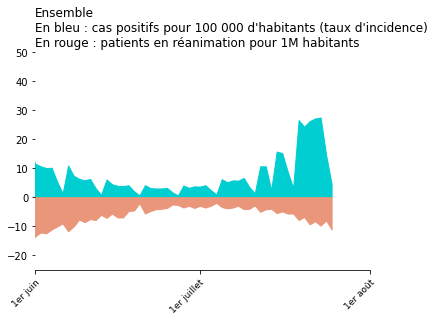

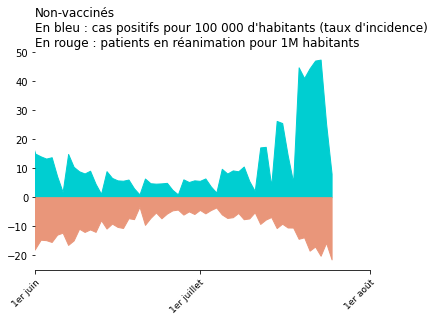

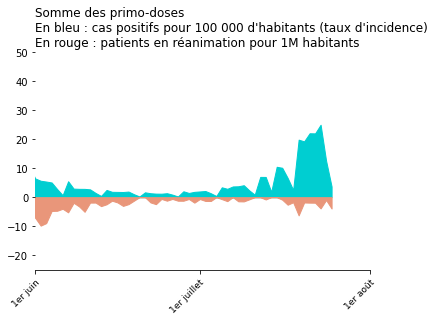

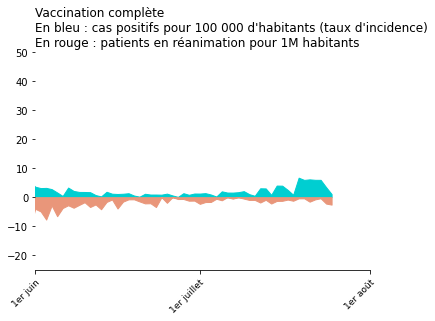

In [25]:
vac_statuts = ['Ensemble', 'Non-vaccinés', 'Somme des primo-doses', 'Vaccination complète']
for vac_statut in vac_statuts:
    plot_Burn_Murdoch(df, vac_statut)

# Autres graphes

In [9]:
def plot_pop_vaccin(df, label, title, dominante):
    plt.rcParams["figure.facecolor"] = (1,1,1,1)
    fig, ax = plt.subplots()
    populations = ['Non-vaccinés', 'Primo dose', 'Vaccination complète']
#     colors = ['red', 'orange', 'green']
    colors = [dominante, 'black', 'firebrick']
    linewidths = [3,                 1.5,            1]
    for population, color, linewidth in zip(populations, colors, linewidths):  
        df_pop = df[df.vac_statut == population]
        ax.plot(df_pop.date, df_pop[label], c = color, label = population, linewidth = linewidth)
    plt.legend(title = title)
    ax.xaxis.set_tick_params(bottom = True, labelsize = 10)
    xloc = []
    for i in range(3):
        xloc.append(dt.datetime(2021, 6 + i, 1))                     
    labels = ['1er juin',
                  '1er juillet', '1er août', ]
    ax.xaxis.set_ticks(xloc)
    ax.xaxis.set_ticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlim(dt.datetime(2021, 6, 15), 
                    dt.datetime(2021, 8, 1))
#     plt.title(label = title)
    save_output(fig, './Autres graphes/', title, with_SVG = True)

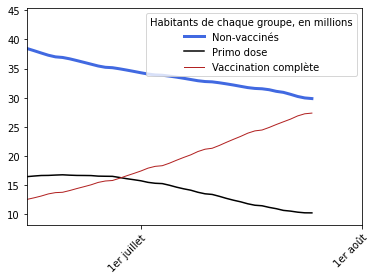

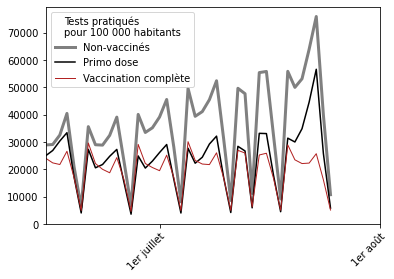

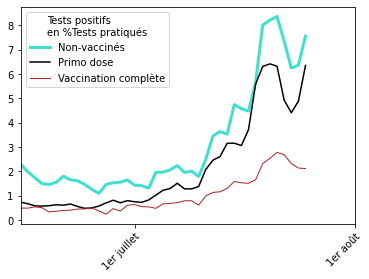

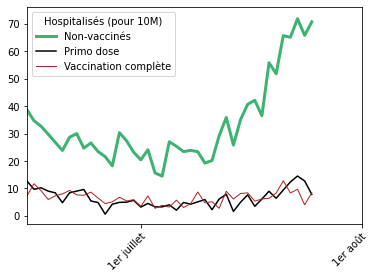

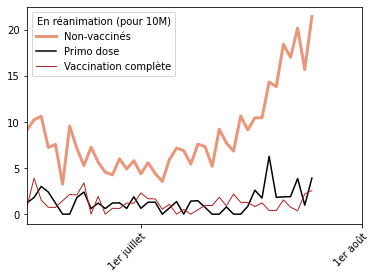

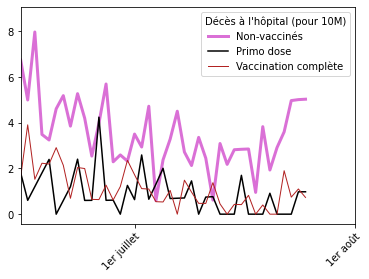

In [10]:
labels = ['Effectif en Mns', 'PCR_odds', 'positivity', 'HC_odds', 'SC_odds', 'DC_odds']
colors = ['royalblue', 'gray', 'turquoise', 'mediumseagreen', 'darksalmon', 'orchid']
titles = ['Habitants de chaque groupe, en millions',
          'Tests pratiqués\npour 100 000 habitants',
          'Tests positifs\nen %Tests pratiqués',
          'Hospitalisés (pour 10M)',
          'En réanimation (pour 10M)',
          'Décès à l\'hôpital (pour 10M)'
         ]

for label, title, color in zip(labels, titles, colors):
    plot_pop_vaccin(df, label, title, color)